## 여러 가지 그래프
### 어떻게 쓰는지?
### 어떤 특징을  담는지?

## ---------------------------------------------------

In [ ]:
'''
Visualization 의 중요성

모든 분석의 정수
이걸로 모든 것을 보여줌
'''

## Histogram

In [ ]:
'''
Histogram
::
hist() 함수 사용

히스토그램은 자료의 도수분포상태를 직사각형 막대로 그래프로 나타냄
데이터의 빈도(도수)에 따라서 막대의 높이가 결정된다
plot() 함수를 이용해서 직선 혹은 꺾은선을
scatter() 함수를 이용해서 산포도(두 변수가 대응하는 정도)를 그림
hist() 함수를 이용해서 막대그래프를 그려보자
'''

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

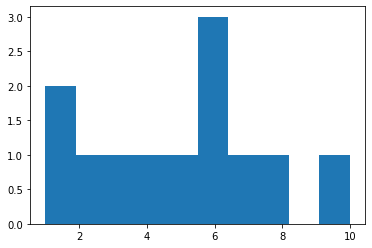

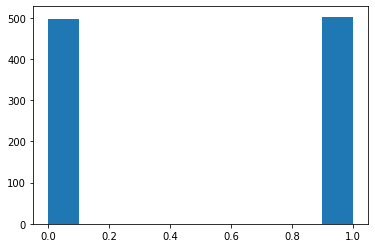

In [9]:
# x = 값, 그 값의 개수를 표시
plt.hist([1,1,2,3,4,5,6,6,6,7,8,10])
plt.show()

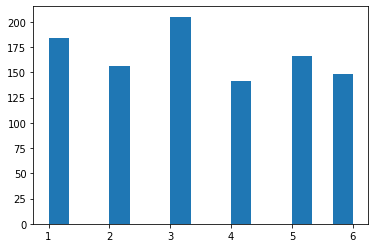

In [39]:
'''
hist() option
::
bins : 해당 막대의 영역을 얼마나 채울 것인지
- 너무 크면 뭉뜨그려지고 너무 작아지면 촘촘해짐

'''
dice=[]
for i in range(1000):
    dice.append(np.random.randint(1,7))
# print(dice)
plt.hist(dice, bins=15)
plt.show()

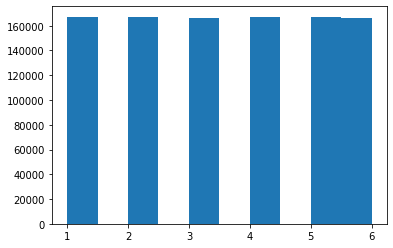

In [41]:
'''
Histogram의 특징
::
(1) 큰 수의 법치 (LLN)
반복 수가 많으면 기대값에 근사한다
주사위의 경우 나오는 횟수가 1/6에 근사한다
'''
dice=[]
for i in range(1000000):
    dice.append(np.random.randint(1,7))
plt.hist(dice)
plt.show()

In [44]:
mu, sigma = 100, 15
x = mu+sigma*np.random.randn(10000)
# len(x) = 10,000개
# x.shape = (1000,) == 1차원


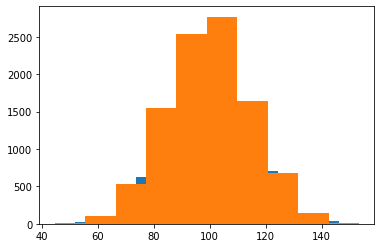

In [51]:
# hist() 리턴값과 핸들링
# 핸들링은 나중에 알아서
plt.hist(x, bins=15)
# show() 없으면 3개 값이 나옴. n(빈도), bins(계급수), patches(히스토그램을 그리기 위한 객체)
n, bins, patches = plt.hist(x)

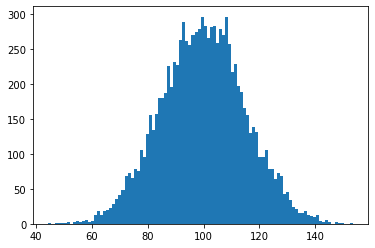

In [53]:
# 값의 정보들을 더 세밀하게 보고 싶다면
n, bins, patches = plt.hist(x, bins=100)

In [62]:
# plot 시 한글이 깨지는 현상 방지!

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!') 

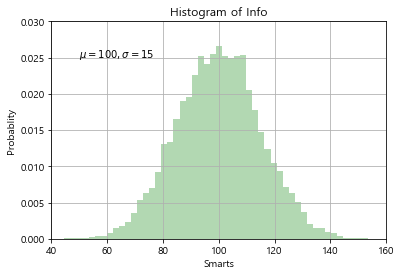

In [77]:
'''
(2) density

(3) facecolor : 색

(4) alpha : 투명도
'''
'''
plt 다른 속성 : plt.text
그래프 안에 텍스트 넣을 때
'''
n, bins, patches = plt.hist(x, bins=50, density=1, facecolor='g',alpha=0.3)
plt.xlabel('Smarts')
plt.ylabel('Probablity')
plt.title('Histogram of Info')
plt.grid()
plt.text(50,0.025,r'$\mu=100, \sigma=15$') # 라틴문자 보이기 $$ 감사고 앞에 \ 넣기
plt.axis([40,160,0,0.03]) # x축과 y축 범위 설정 : 앞 뒤 = x y
plt.show()

## Pandas를 이용한 plot 시각화

In [89]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000', periods=1000)) # periods 단위 day
ts

2000-01-01   -0.497653
2000-01-02   -0.766021
2000-01-03   -0.015013
2000-01-04   -1.684261
2000-01-05    0.690259
                ...   
2002-09-22    1.454389
2002-09-23   -0.259855
2002-09-24   -1.129989
2002-09-25    0.721507
2002-09-26   -1.271577
Freq: D, Length: 1000, dtype: float64

In [90]:
ts = ts.cumsum() # 정규분포의 누적값으로 할당

2000-01-01    -0.497653
2000-01-02    -1.263674
2000-01-03    -1.278687
2000-01-04    -2.962948
2000-01-05    -2.272689
                ...    
2002-09-22    25.735912
2002-09-23    25.476057
2002-09-24    24.346068
2002-09-25    25.067576
2002-09-26    23.795999
Freq: D, Length: 1000, dtype: float64

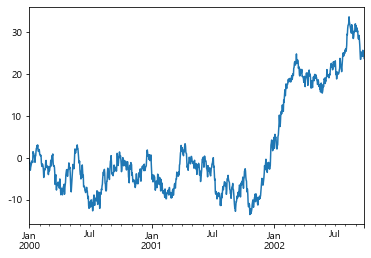

In [92]:
ts.plot()

In [106]:
# linspace
x=np.linspace(0.14,100) # 0~14까지의 값을 100 간격으로 쪼갤 때 사용
y=np.sin(x)

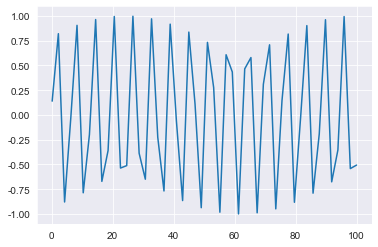

In [104]:
'''
seaborn
::
plt에 style 먹이기

'''
sns.set_style('darkgrid')
plt.plot(x,y)
plt.show()

## Seaborn - Boxplot

In [ ]:
'''
https://seaborn.pydata.org/
gallary

Boxplot
::
하위 25%, 상위 25% 사이 범위를 보여주는 그래프
이상치 = 범위 밖 데이터

1. 극단적인 이상치를 확인할 때
ex) 중앙값 vs 평균 : 이상치 구별 여부
데이터 성격에 따라 극단치 핸들링이 달라짐
- 제거, 변경, 단위변경

2. 중앙값 기준의 분포 확인
'''

In [112]:
# 0~100까지의 총 101개의 숫자를 만든다.
xs = np.array(np.linspace(start=0,stop=100,num=101))
xs

df=DataFrame(xs, columns=['feature'])


feature    50.0
dtype: float64

AttributeError: module 'matplotlib.pyplot' has no attribute 'acorryticks'

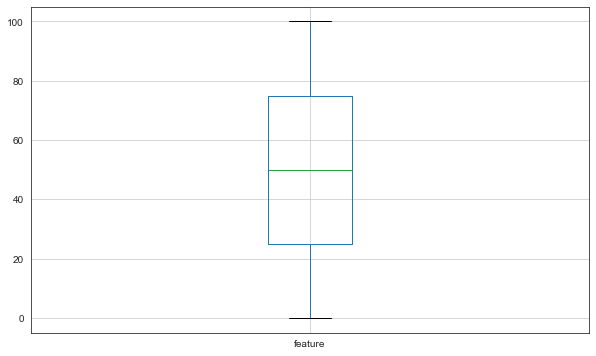

In [127]:
'''
출력결과를 보면,
25, 75 사이에 box가 그려짐
중앙값인 50에 녹색선이 그려짐
최소값, 최대값에 검은선이 그려짐... 전체 데이터를 4등분하고 있다
4분위를 알 수 있다
'''
sns.set_style('white')
plt.figure(figsize=(10,6)) # 크기 지정
df.boxplot(column=['feature'])
plt.acorryticks(np.arange(0,101,step=5))
plt.show()


### 실전 데이터

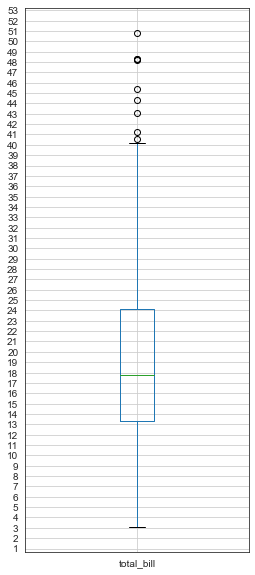

In [122]:
tips=sns.load_dataset('tips') # sns에 데이터 이미 들어있음
tips
plt.figure(figsize=(4,10))
plt.yticks(np.arange(0,60,1))
tips.boxplot(column=['total_bill'])

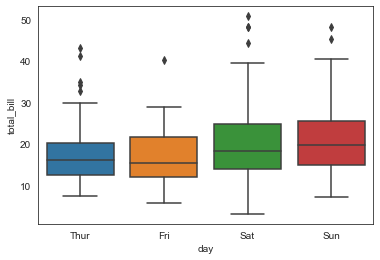

In [131]:
# 요일별 음식지불금액 이상치 확인.. 요일별 total.bill
sns.boxplot(x='day', y='total_bill',data=tips)
plt.show()
# 편차 크다 = 중앙값을 기준으로 박스 넓이가 다르다

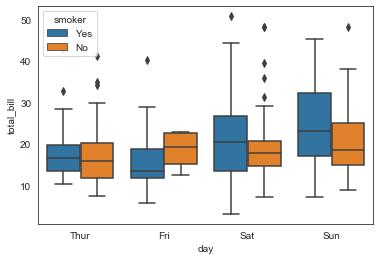

In [132]:
# 요일별 total_bill... 흡연자와 비흡연자를 비교해서 보고 싶다
# !!! hue 속성
'''
hue
::
서로 비교해서 살펴볼 매개변수를 지정할 때 사용
색상으로 대조해서 나타난다
'''
sns.boxplot(x='day', y='total_bill',hue='smoker',data=tips)
plt.show()
'''
해석
1) 금요일에는 비흡연자가 더 많이 지불함
'''

## boxplot : 이상치 처리


In [ ]:
'''
boxplot 이상치값 제거하는 방법
1) 이상치 제거
2) 이상치값 변환 - NaN 많이 사용
'''

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

<Figure size 720x720 with 0 Axes>

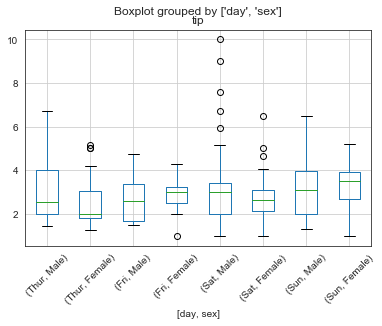

In [139]:
# 그룹핑까지
plt.figure(figsize=(10,10))
z = tips.boxplot(column=['tip'], by=['day','sex'])
plt.xticks(rotation=45) # 회전하기

In [145]:
# 이상치 제거 함수 만들기
def removeOutlier(x, column) :
    # Q1, Q3 구현
    q1 = x[column].quantile(0.25) # 4분위 함수
    q3 = x[column].quantile(0.75) # 4분위 함수
    
    # iqt(IQR(사분위 범위) 범위를 벗어난 값 기준)
    iqt = 1.5*(q3-q1)
    
    # 원래 데이터 복제
    y = x
    
    y['tip'][(tips['tip']>(q3+iqt)) | (tips['tip']<(q1-iqt))] = None
    y['tip']
    
    return y

C:\kjy\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


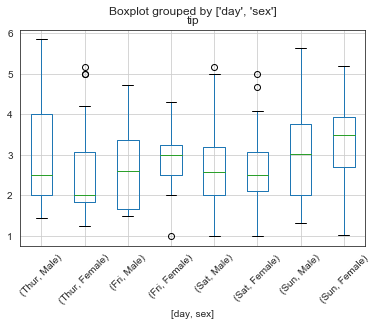

In [146]:
removeOutlier(tips, 'tip').boxplot(column=['tip'], by=['day','sex'])
plt.xticks(rotation=45) # 회전하기
plt.show()

## lmplot

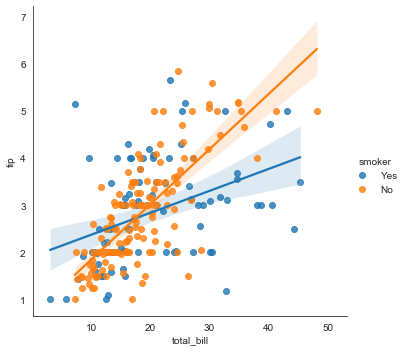

In [152]:
'''
선
쉐도우
의 의미 정리

이 그래프를 어떤 데이터에 적용시킬지
각각의 그래프별 특징... 정리한 결과물

'''
sns.lmplot(x='total_bill',y='tip',data=tips)
plt.show()

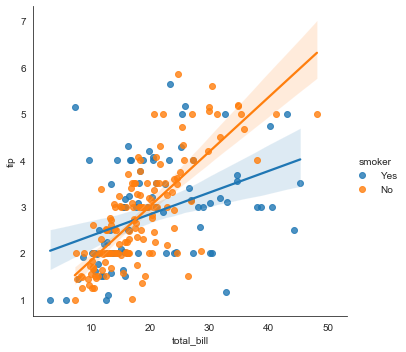

In [153]:
'''
total_bill에 따른 tip을 더 많이 주는 사람이 흡연여부에 따라 알기

'''
sns.lmplot(x='total_bill',y='tip',data=tips,hue='smoker')
plt.show()

## HeatMap

In [159]:
flight = sns.load_dataset('flights')
flight

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [166]:
# pivot을 사용해서 moth를 인덱스, year 컬럼 ... passenger를 벨류로
flightp=flight.pivot_table(values='passengers', index='month', columns='year')
flightp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


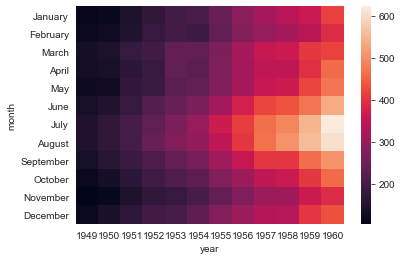

In [169]:
'''
HeatMap
::
x, y별로 데이터가 어떤지 시각적으로 알고 싶을 때 주로 사용
전범위적으로 통합적으로 볼 때

위 자료에 적용
x=year, y=month
값이 점점 커지는 쪽은 점점 환해지는 쪽
결론은 1960년 7월 휴가철에 점철됨
'''
sns.heatmap(flightp)

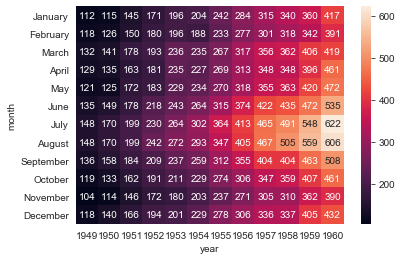

In [170]:
'''
annot : 값 보이기 속성
fmt : 값 형식 'd'=숫자
'''
sns.heatmap(flightp, annot=True, fmt='d')